<a href="https://colab.research.google.com/github/Airinelizabath/PROGRAMREPO/blob/main/ML_project_TitanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC DATASET**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


***** Test_Set *****
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000 

In [ ]:
#percentage of missing values in train and test set

data=[train,test]
for datasets in data:
  total = datasets.isnull().sum().sort_values(ascending=False)
  percent_1 = datasets.isnull().sum()/datasets.isnull().count()*100
  percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
  missing_data = pd.concat([total, percent_2], axis=1, keys=['TotalMissing', '%Missing'])
  print(missing_data.head(5))

          TotalMissing  %Missing
Cabin              687      77.1
Age                177      19.9
Embarked             2       0.2
Fare                 0       0.0
Ticket               0       0.0
          TotalMissing  %Missing
Cabin              327      78.2
Age                 86      20.6
Fare                 1       0.2
Embarked             0       0.0
Ticket               0       0.0


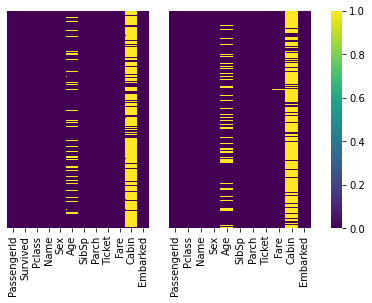

In [ ]:
#visualizatio of missing values

fig, (ax1,ax2,axcb) = plt.subplots(1, 3,gridspec_kw={'width_ratios':[1,1,0.08]})
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',ax=ax1,cbar=False)
sns.heatmap(test.isnull(),yticklabels=False,cbar=True,cmap='viridis',ax=ax2,cbar_ax=axcb)


**CHECKING CORREALTIONS**

             PassengerId  Survived    Pclass  ...     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  ... -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481  ... -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000  ...  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  ... -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081  ...  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443  ...  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  ...  0.159651  0.216225  1.000000

[7 rows x 7 columns]


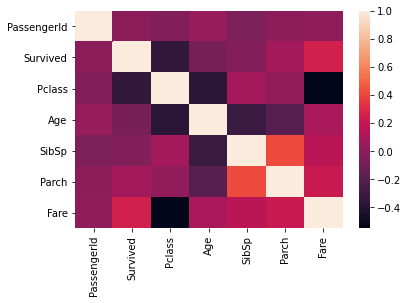

In [ ]:
sns.heatmap(train.corr())
print(train.corr())

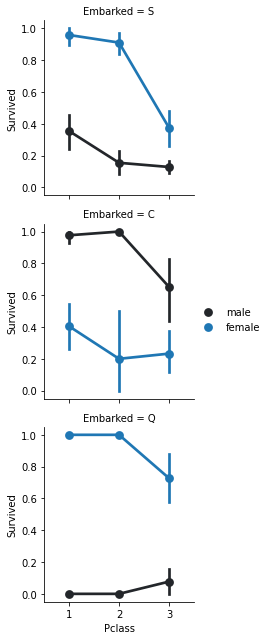

In [ ]:
#relation between embarkment and survival.. women from S & Q have higher survival rate whereas it is high for men in C

FacetGrid = sns.FacetGrid(train, row='Embarked')
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()


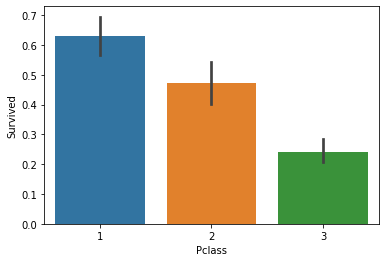

In [ ]:
#Pclass is contributing to a persons chance of survival. Class 1 has high survival rate


sns.barplot(x='Pclass', y='Survived', data=train)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


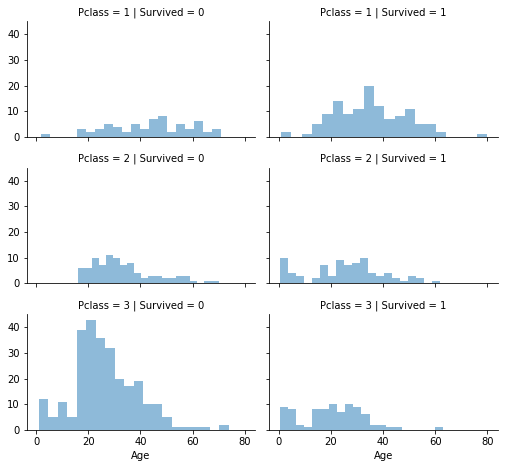

In [ ]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
#The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


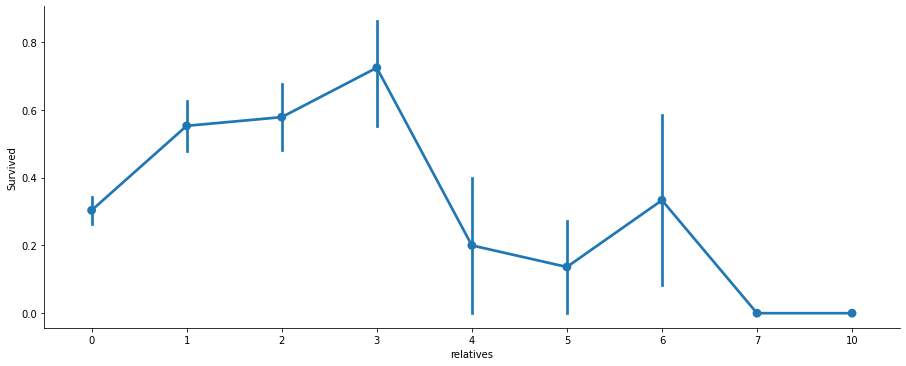

In [ ]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()
axes = sns.factorplot('relatives','Survived', data=train, aspect = 2.5, )


#high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives)

# **PREPROCESSING**

ADDING MISSING VALUES(IMPUTATION)

In [ ]:
#create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.
#for loop is for train , test'''


data = [train, test]

for dataset in data:
    mean = train["Age"].mean()  #29.69911764705882 train
    std = test["Age"].std()      #14.526497332334044 train
    is_null = dataset["Age"].isnull().sum()  #177
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
train["Age"].isnull().sum()



0

In [ ]:
train["Age"].describe()

count    891.000000
mean      29.507295
std       13.459331
min        0.000000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
#common value of embarkement is used to fill misssing data

common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
train.info()

#every missing value is cleared

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  relatives    891 non-null    int64  
 13  not_alone    891 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 97.6+ KB


In [ ]:
#fare to int
data = [train, test]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

NON-NUMERIC TO NUMERIC

In [ ]:
#gender to numeric value
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
#EMBARKED TO NUMERIC VALUES
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

CATEGORICAL VALUES

In [ ]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [ ]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

NEW FEATURES

In [ ]:
#newfeature deck

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test= test.drop(['Cabin'], axis=1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


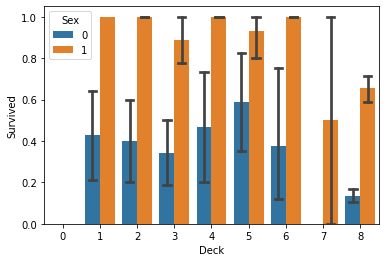

In [ ]:

sns.barplot('Deck','Survived',data=train,hue='Sex',capsize=.2)

In [ ]:
#new feature
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test= test.drop(['Name'], axis=1)

In [ ]:
data = [train, test]
'''for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']'''
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

DROP INSIGNIFICANT FEATURES

In [ ]:
train=train.drop(['PassengerId','Ticket','Parch','SibSp'],axis=1)  
test=test.drop(['PassengerId','Ticket','Parch','SibSp'],axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Survived         891 non-null    int64
 1   Pclass           891 non-null    int64
 2   Sex              891 non-null    int64
 3   Age              891 non-null    int64
 4   Fare             891 non-null    int64
 5   Embarked         891 non-null    int64
 6   relatives        891 non-null    int64
 7   not_alone        891 non-null    int64
 8   Deck             891 non-null    int64
 9   Title            891 non-null    int64
 10  Fare_Per_Person  891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Pclass           418 non-null    int64
 1   Sex              418 non-null    int64
 2   Age              418 non-null    int64
 3   Fare             418 non-null    int64
 4   Embarked         418 non-null    int64
 5   relatives        418 non-null    int64
 6   not_alone        418 non-null    int64
 7   Deck             418 non-null    int64
 8   Title            418 non-null    int64
 9   Fare_Per_Person  418 non-null    int64
dtypes: int64(10)
memory usage: 32.8 KB


In [ ]:
X = np.array(train.drop(['Survived'], 1).astype(float))
y = np.array(train['Survived'])

SCALING

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(test)

# **KMEANS**

In [ ]:
train=X[:610]
train_y=y[:610]
val=X[610:]
val_y=y[610:]

In [ ]:
kmeans=KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn.model_selection import cross_val_score
#model = KNeighborsClassifier(n_neighbors = 3)
scores = cross_val_score(kmeans, X,y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
k_kmean=round(scores.mean()*100,2)

Scores: [0.48888889 0.59550562 0.40449438 0.61797753 0.57303371 0.29213483
 0.69662921 0.41573034 0.3258427  0.30337079]
Mean: 0.4713607990012484
Standard Deviation: 0.1368878555932096


CHECKING HOW MANY ARE CORRECTLY PREDICTED

In [ ]:
#test
correct = 0
for i in range(len(train)):
    predict1_me = np.array(train[i].astype(float))
    predict1_me = predict1_me.reshape(-1, len(predict1_me))
    prediction1 = kmeans.predict(predict1_me)
    if prediction1[0] == train_y[i]:
        correct += 1
acc_Tkmeans=round(correct/len(train)*100,2)
print(acc_Tkmeans)


39.51


In [ ]:
#val
correct = 0
for i in range(len(val)):
    predict_me = np.array(val[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == val_y[i]:
        correct += 1
acc_kmeans=round(correct/len(val)*100,2)
print(acc_kmeans)


34.52


# **LOGISTIC** **REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
train=X[:610]
train_y=y[:610]
val=X[610:]
val_y=y[610:]

In [ ]:
logreg = LogisticRegression()
logreg.fit(train,train_y)
Y_pred = logreg.predict(X_test)
acc_logreg=round(logreg.score(val,val_y) * 100, 2)

In [ ]:
acc_T_logreg= round(logreg.score(train,train_y)*100,2)
acc_T_logreg

80.0

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X,y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
k_lg=round(scores.mean()*100,2)

Scores: [0.78888889 0.80898876 0.7752809  0.85393258 0.79775281 0.7752809
 0.84269663 0.78651685 0.82022472 0.82022472]
Mean: 0.8069787765293382
Standard Deviation: 0.025837838114642412


# **KNN**

In [ ]:
train=X[:610]
train_y=y[:610]
val=X[610:]
val_y=y[610:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(train,train_y)  
Y_pred = knn.predict(X_test)  
acc_knn=round(knn.score(val,val_y) * 100, 2)
acc_knn

83.99

In [ ]:
acc_T_knn= round(knn.score(train,train_y)*100,2)
acc_T_knn

87.38

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3) 

from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier(n_neighbors = 3)
scores = cross_val_score(model, X,y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
k_knn=round(scores.mean()*100,2)

Scores: [0.76666667 0.83146067 0.73033708 0.83146067 0.84269663 0.80898876
 0.79775281 0.78651685 0.85393258 0.82022472]
Mean: 0.8070037453183522
Standard Deviation: 0.03586288513658996


# **Linear SVM**

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
train=X[:610]
train_y=y[:610]
val=X[610:]
val_y=y[610:]

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(train,train_y)

Y_pred = linear_svc.predict(X_test)

acc_lsvc=round(linear_svc.score(val,val_y) * 100, 2)
acc_lsvc

81.49

In [ ]:
acc_T_lsvc=round(linear_svc.score(train,train_y)*100,2)
acc_T_lsvc

81.31

In [ ]:
'''from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC, LinearSVC
X = X[:,:-1]
y = X[:,-1]
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LinearSVC()
 
result = cross_val_score(model , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))'''


from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_svc, X,y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
k_svm=round(scores.mean()*100,2)

Scores: [0.8        0.82022472 0.76404494 0.86516854 0.80898876 0.78651685
 0.83146067 0.80898876 0.80898876 0.80898876]
Mean: 0.8103370786516854
Standard Deviation: 0.025248668593596656


# **DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train,train_y)
Y_pred = decision_tree.predict(X_test)
acc_dt=round(decision_tree.score(val,val_y) * 100, 2)
acc_dt

80.43

In [ ]:
acc_T_dt= round(decision_tree.score(train,train_y)*100,2)
acc_T_dt

92.79

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree, X,y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
k_dt=round(scores.mean()*100,2)

Scores: [0.77777778 0.79775281 0.68539326 0.82022472 0.85393258 0.83146067
 0.7752809  0.84269663 0.84269663 0.85393258]
Mean: 0.8081148564294631
Standard Deviation: 0.049445295144351954


# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_y)
Y_prediction = random_forest.predict(X_test)

random_forest.score(val, val_y)
acc_rf=round(random_forest.score(val, val_y) * 100, 2)
acc_rf

81.49

In [ ]:
acc_T_rf=round(random_forest.score(train,train_y)*100,2)
acc_T_rf

92.79

In [ ]:

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X,y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
k_rt=round(scores.mean()*100,2)

Scores: [0.75555556 0.82022472 0.74157303 0.83146067 0.86516854 0.82022472
 0.83146067 0.78651685 0.85393258 0.83146067]
Mean: 0.8137578027465668
Standard Deviation: 0.038237554367952696


# **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB() 
gaussian.fit(train,train_y)
Y_pred = gaussian.predict(X_test)  
acc_gaussian=round(gaussian.score(val, val_y) * 100, 2)
acc_gaussian

81.49

In [ ]:
acc_T_gaussian=round(gaussian.score(train,train_y)*100,2)
acc_T_gaussian

77.05

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gaussian, X,y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
k_nb=round(scores.mean()*100,2)

Scores: [0.71111111 0.71910112 0.76404494 0.76404494 0.79775281 0.76404494
 0.76404494 0.82022472 0.79775281 0.79775281]
Mean: 0.7699875156054932
Standard Deviation: 0.03321689886294502


In [ ]:
#arranging training accuracy
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Support Vector Machines','Decision Tree',   
              'Random Forest', 'Naive Bayes','KMeans'],
    'Score': [acc_T_logreg,acc_T_knn,acc_T_lsvc,acc_T_dt,acc_T_rf,acc_T_gaussian,acc_Tkmeans]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(8)


,Model
Score,
92.79,Decision Tree
92.79,Random Forest
87.38,KNN
81.31,Support Vector Machines
80.00,Logistic Regression
77.05,Naive Bayes
39.51,KMeans


In [ ]:
#testing accuracy
results = pd.DataFrame({
    'Model': ['KMeans','Logistic Regression','KNN','Support Vector Machines','Decision Tree',   
              'Random Forest', 'Naive Bayes'],
    'Score': [acc_kmeans,acc_logreg,acc_knn,acc_lsvc,acc_dt,acc_rf,acc_gaussian]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
83.99,KNN
81.49,Support Vector Machines
81.49,Random Forest
81.49,Naive Bayes
80.43,Decision Tree
79.72,Logistic Regression
34.52,KMeans


In [ ]:
#using cross validation
results = pd.DataFrame({
    'Model': ['KMeans','Logistic Regression','KNN','Support Vector Machines','Decision Tree',   
              'Random Forest', 'Naive Bayes'],
    'Score': [k_kmean,k_lg,k_knn,k_svm,k_dt,k_rt,k_nb]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
81.38,Random Forest
81.03,Support Vector Machines
80.81,Decision Tree
80.70,Logistic Regression
80.70,KNN
77.00,Naive Bayes
47.14,KMeans
